# Applying classifiers to Shalek2013 and Macaulay2016

We're going to use the classifier knowledge that we've learned so far and apply it to the shalek2013 and macaulay2016 datasets.

In [15]:
# Alphabetical order is standard
# We're doing "import superlongname as abbrev" for our laziness - this way we don't have to type out the whole thing each time.

# Python plotting library
import matplotlib.pyplot as plt

# Numerical python library (pronounced "num-pie")
import numpy as np

# Dataframes in Python
import pandas as pd

# T-test of independent samples
from scipy.stats import ttest_ind

# Statistical plotting library we'll use
import seaborn as sns
sns.set(style='whitegrid')

# Matrix decomposition
from sklearn.decomposition import PCA, FastICA

# Matrix decomposition
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Manifold learning
from sklearn.manifold import MDS, TSNE

# Gene ontology

# This is necessary to show the plotted figures inside the notebook -- "inline" with the notebook cells
%matplotlib inline


In [28]:
shalek2013_metadata = pd.read_csv('../data/shalek2013/metadata.csv', 
                               
                                     # Sets the first (Python starts counting from 0 not 1) column as the row names
                                      index_col=0)
shalek2013_expression = pd.read_csv('../data/shalek2013/expression.csv', 
                               
                                     # Sets the first (Python starts counting from 0 not 1) column as the row names
                                      index_col=0)
shalek2013_expression_feature = pd.read_csv('../data/shalek2013/expression_feature.csv', 
                               
                                     # Sets the first (Python starts counting from 0 not 1) column as the row names
                                      index_col=0)

In [29]:
from sklearn.svm import SVC

In [30]:
classifier = SVC(kernel='linear')

In [31]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

In [32]:
shalek2013_singles = shalek2013_expression.loc[[x for x in shalek2013_expression.index if x.startswith('S')]]
shalek2013_singles.shape

(18, 6312)

In [33]:
shalek2013_singles = shalek2013_singles.loc[:, (shalek2013_singles > 1).sum() >= 3]
shalek2013_singles.shape

(18, 6013)

In [34]:
mature = 'S12', 'S13', 'S16'
target = [1 if x in mature else 0 for x in shalek2013_singles.index]
target

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0]

In [35]:
classifier.fit(shalek2013_singles, target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE, MDS


smusher = FastICA(n_components=4)
reduced_data = smusher.fit_transform(shalek2013_singles+1)

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/sklearn/decomposition/fastica_.py:116: UserWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


In [40]:
reduced_data_df = pd.DataFrame(reduced_data)

In [41]:
reduced_data_df.min()

0   -0.622349
1   -0.859846
2   -0.248629
3   -0.331960
dtype: float64

In [42]:
reduced_data_df.max()

0    0.374354
1    0.325282
2    0.601110
3    0.379621
dtype: float64

In [43]:
reduced_data_df.quantile(1)

0    0.374354
1    0.325282
2    0.601110
3    0.379621
dtype: float64

In [51]:
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
X = np.linspace(x_min, x_max, 50)
Y = np.linspace(y_min, y_max, 50)
xx, yy = np.meshgrid(X, Y)

# Get the decision boundary
# Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])

two_d_space = np.c_[xx.ravel(), yy.ravel()]
two_d_space

array([[-1.62234918, -1.85984627],
       [-1.56119198, -1.85984627],
       [-1.50003477, -1.85984627],
       ..., 
       [ 1.2520393 ,  1.32528192],
       [ 1.3131965 ,  1.32528192],
       [ 1.3743537 ,  1.32528192]])

In [61]:
xx.shape

(50, 50)

In [62]:
np.concatenate([xx.ravel(), yy.ravel()]).reshape(50**2, 2)

array([[-1.62234918, -1.56119198],
       [-1.50003477, -1.43887757],
       [-1.37772037, -1.31656317],
       ..., 
       [ 1.32528192,  1.32528192],
       [ 1.32528192,  1.32528192],
       [ 1.32528192,  1.32528192]])

In [52]:
two_d_space.shape

(2500, 2)

/Users/olga/anaconda3/envs/single-cell-bioinformatics/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


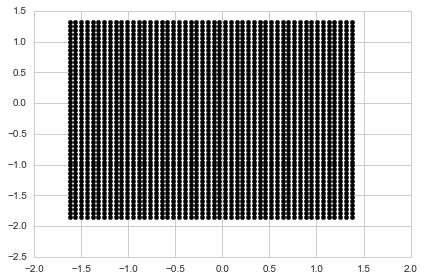

In [53]:
plt.scatter(two_d_space[:, 0], two_d_space[:, 1], color='black')

In [56]:
unsmushed = smusher.inverse_transform(two_d_space)

ValueError: shapes (2500,2) and (4,6013) not aligned: 2 (dim 1) != 4 (dim 0)

In [57]:
Z = classifier.decision_function(unsmushed)
Z = Z.reshape(xx.shape)

NameError: name 'unsmushed' is not defined

In [ ]:
fig, ax = plt.subplots()
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], c=target, cmap='Dark2')
ax.contour(X, Y, Z, colors='k',
           levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

### Exercise 1

1. Try the same analysis, but use ICA instead of PCA. 
    1. How are the results different? 
    2. Are the cells closer or farther from the decision boundary? 
    3. Is that a "better" or "worse" classification? Why?
    4. Why does the reduction algorithm affect the visualization of the classification?
2. Try the same analysis, but use MDS or t-SNE instead of PCA. 
    1. How are the results different? 
    2. Are the cells closer or farther from the decision boundary? 
    3. Is that a "better" or "worse" classification? Why?
3. Try the same analysis, but use the "LPS Response" genes and a dimensionality reduction algorithm of your choice.
    1. How are the results different? 
    2. Are the cells closer or farther from the decision boundary? 
    3. Is that a "better" or "worse" classification? Why?

## Decision trees

In [ ]:
def visualize_tree(estimator, X, y, smusher, boundaries=True,
                   xlim=None, ylim=None):
    estimator.fit(X, y)
    smushed = smusher.fit_transform(X)

    if xlim is None:
        xlim = (smushed[:, 0].min() - 0.1, smushed[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (smushed[:, 1].min() - 0.1, smushed[:, 1].max() + 0.1)

    x_min, x_max = xlim
    y_min, y_max = ylim
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    two_d_space = np.c_[xx.ravel(), yy.ravel()]
    unsmushed = smusher.inverse_transform(two_d_space)
    Z = estimator.predict(unsmushed)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='Paired')
    plt.clim(y.min(), y.max())

    # Plot also the training points
    plt.scatter(smushed[:, 0], smushed[:, 1], c=y, s=50, cmap='Paired')
    plt.axis('off')

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    plt.clim(y.min(), y.max())
    
    # Plot the decision boundaries
    def plot_boundaries(i, xlim, ylim):
        if i < 0:
            return

        tree = estimator.tree_
        
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
            
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()


from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE, MDS


smusher = PCA(n_components=2)
# reduced_data = smusher.fit_transform(shalek2013_singles+1)

visualize_tree(classifier, shalek2013_singles, np.array(target), smusher)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
classifier = RandomForestClassifier()

smusher = PCA(n_components=2)
# reduced_data = smusher.fit_transform(shalek2013_singles+1)

visualize_tree(classifier, shalek2013_singles, np.array(target), smusher, boundaries=False)

In [ ]:
classifier = ExtraTreesClassifier()

smusher = PCA(n_components=2)
# reduced_data = smusher.fit_transform(shalek2013_singles+1)

visualize_tree(classifier, shalek2013_singles, np.array(target), smusher, boundaries=False)

### Macaulay2016

In [ ]:
pd.options.display.max_columns = 50

In [ ]:
macaulay2016_metadata = pd.read_csv('../4._Case_Study/macaulay2016/sample_info_qc.csv', index_col=0)
macaulay2016_metadata.head()

In [ ]:
macaulay2016_cluster_names = tuple(sorted(macaulay2016_metadata['cluster'].unique()))
macaulay2016_cluster_names

In [ ]:
macaulay2016_target = macaulay2016_metadata['cluster'].map(lambda x: macaulay2016_cluster_names.index(x))
macaulay2016_target

In [ ]:
macaulay2016_expression = pd.read_csv('../4._Case_Study/macaulay2016/gene_expression_s.csv', index_col=0).T


In [ ]:
macaulay2016_expression.head()

In [ ]:
macaulay2016_expression_filtered = macaulay2016_expression[[x for x in macaulay2016_expression if x.startswith("ENS")]]
macaulay2016_expression_filtered.shape

In [ ]:
macaulay2016_expression_filtered = macaulay2016_expression_filtered.loc[macaulay2016_metadata.index]

In [ ]:
macaulay2016_expression_filtered = 1e6*macaulay2016_expression_filtered.divide(macaulay2016_expression_filtered.sum(axis=1), axis=0)
macaulay2016_expression_filtered.head()

In [ ]:
macaulay2016_expression_filtered = np.log10(macaulay2016_expression_filtered+1)
macaulay2016_expression_filtered.head()

In [ ]:
macaulay2016_expression_filtered = macaulay2016_expression_filtered.loc[:, (macaulay2016_expression_filtered > 1).sum() >=3]
macaulay2016_expression_filtered.shape

In [ ]:
# classifier = SVC(kernel='linear')
# classifier = DecisionTreeClassifier(max_depth=10)
classifier = ExtraTreesClassifier(n_estimators=1000)
classifier.fit(macaulay2016_expression_filtered, macaulay2016_target)

In [ ]:
smusher = FastICA(n_components=2, random_state=0)
smushed_data = smusher.fit_transform(macaulay2016_expression_filtered)

x_min, x_max = smushed_data[:, 0].min(), smushed_data[:, 0].max()
y_min, y_max = smushed_data[:, 1].min(), smushed_data[:, 1].max()
delta_x = 0.05 * abs(x_max - x_min)
delta_y = 0.05 * abs(x_max - x_min)

x_min -= delta_x
x_max += delta_x
y_min -= delta_y
y_max += delta_y

X = np.linspace(x_min, x_max, 100)
Y = np.linspace(y_min, y_max, 100)
xx, yy = np.meshgrid(X, Y)

two_d_space = np.c_[xx.ravel(), yy.ravel()]
two_d_space

In [ ]:
high_dimensional_space = smusher.inverse_transform(two_d_space)

In [ ]:
# Get the class boundaries
Z = classifier.predict(high_dimensional_space)

In [ ]:
import matplotlib as mpl
macaulay2016_metadata['cluster_color_hex'] = macaulay2016_metadata['cluster_color'].map(lambda x: mpl.colors.rgb2hex(eval(x)))

In [ ]:
int_to_cluster_name = dict(zip(range(len(macaulay2016_cluster_names)), macaulay2016_cluster_names))
int_to_cluster_name


In [ ]:
cluster_name_to_color = dict(zip(macaulay2016_metadata['cluster'], macaulay2016_metadata['cluster_color_hex']))
cluster_name_to_color

In [ ]:
macaulay2016_palette = [mpl.colors.hex2color(cluster_name_to_color[int_to_cluster_name[i]]) 
                        for i in range(len(macaulay2016_cluster_names))]
macaulay2016_palette


In [ ]:
cmap = mpl.colors.ListedColormap(macaulay2016_palette)
cmap

In [ ]:
x_min, x_max

In [ ]:
y = macaulay2016_target
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap=cmap)
plt.clim(y.min(), y.max())

# Plot also the training points
plt.scatter(smushed_data[:, 0], smushed_data[:, 1], s=50, color=macaulay2016_metadata['cluster_color_hex'], 
            edgecolor='k') #c=macaulay2016_target, s=50, cmap='Set2')
plt.axis('off')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)        
plt.clim(y.min(), y.max())

In [ ]:
smusher = FastICA(n_components=4, random_state=354)
smushed_data = pd.DataFrame(smusher.fit_transform(macaulay2016_expression_filtered))

# x_min, x_max = smushed_data[:, 0].min(), smushed_data[:, 0].max()
# y_min, y_max = smushed_data[:, 1].min(), smushed_data[:, 1].max()
# delta_x = 0.05 * abs(x_max - x_min)
# delta_y = 0.05 * abs(x_max - x_min)

# x_min -= delta_x
# x_max += delta_x
# y_min -= delta_y
# y_max += delta_y

# X = np.linspace(x_min, x_max, 100)
# Y = np.linspace(y_min, y_max, 100)
# xx, yy = np.meshgrid(X, Y)

# low_dimensional_space = np.c_[xx.ravel(), yy.ravel()]
# low_dimensional_space

In [ ]:
smushed_data.max() - smushed_data.min()

In [ ]:
grid = smushed_data.apply(lambda x: pd.Series(np.linspace(x.min(), x.max(), 50)))
grid.head()
# grid = [x.ravel() for x in grid]
# grid
# low_dimensional_space = np.concatenate(grid, axis=0)
# low_dimensional_space.shape
# # low_dimensional_space = low_dimensional_space.reshape(shape)

In [ ]:
x1, x2, x3, x4 = np.meshgrid(*[grid[col] for col in grid])
low_dimensional_space = np.c_[x1.ravel(), x2.ravel(), x3.ravel(), x4.ravel()]

In [ ]:
high_dimensional_space = smusher.inverse_transform(low_dimensional_space)

In [ ]:
smushed_data['hue'] = macau

In [ ]:
sns.pairplot(smushed_data)